# Introducción

Objetivo del proyecto:
Diseñar un modelo de aprendizaje automático capaz de anticipar la cancelación de servicios (churn) por parte de los clientes de Telecom X.
Este desafío forma parte del programa de especialización en Ciencia de Datos del programa ONE de Alura.


# Desarrollo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url='https://raw.githubusercontent.com/Ny-dia/PrediccionDeCancelacion/refs/heads/main/df.csv'

In [3]:
df= pd.read_csv(url)

In [4]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [5]:
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,NumServices,TenureGroup,PremiumCustomer
0,0.0,Female,No,Yes,Yes,9,Yes,No,DSL,No,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,3,0-1 año,0
1,0.0,Male,No,No,No,9,Yes,Yes,DSL,No,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1,0-1 año,0
2,1.0,Male,No,No,No,4,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,1,0-1 año,1
3,1.0,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,4,1-2 años,1
4,1.0,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2,0-1 año,1


En un desarrollo previo —disponible en este repositorio — se realizó un análisis exploratorio de los datos. Entre los hallazgos más relevantes para la selección de variables del modelo, se observó que los clientes que cancelan sus servicios (churn) tienden a pagar tarifas más elevadas. Este comportamiento podría estar vinculado a una percepción negativa del valor ofrecido o a una insatisfacción con el precio, lo que sugiere que el costo del servicio es un factor potencialmente determinante en la decisión de abandono.
valor.

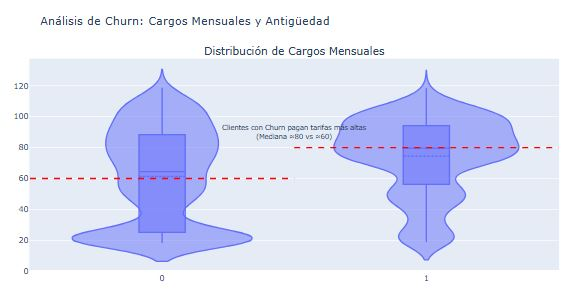



Otro hallazgo clave del análisis exploratorio fue la diferencia significativa en la antigüedad de los clientes: aquellos que abandonan el servicio presentan una permanencia promedio de aproximadamente 10 meses, mientras que los clientes que se mantienen activos superan los 40 meses. Esta brecha sugiere que el riesgo de churn es considerablemente mayor en las etapas iniciales del ciclo de vida del cliente, lo que refuerza la necesidad de implementar estrategias de fidelización temprana y acompañamiento proactivo desde los primeros meses.

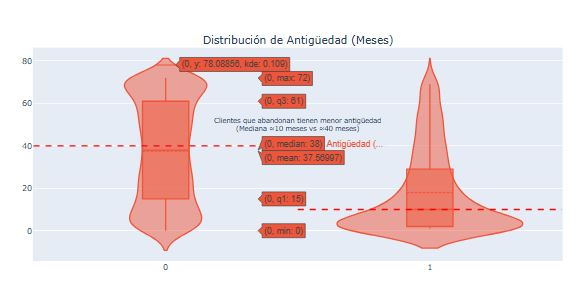

También se examinó la relación entre la contratación de servicios digitales y la probabilidad de cancelación, como se ilustra en la figura siguiente. Este análisis permitió identificar patrones relevantes que podrían influir en el comportamiento de los clientes, aportando información valiosa para la selección de variables en el modelo predictivo.

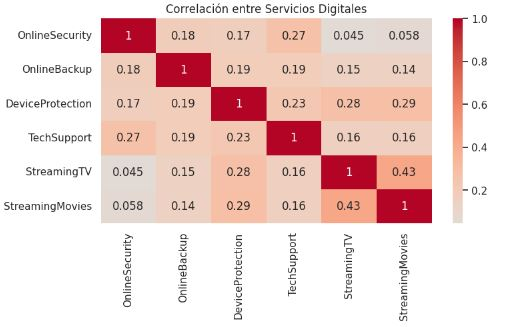


También es evidente que el tipo de contrato y  método de pago son variables relevantes para el churn.

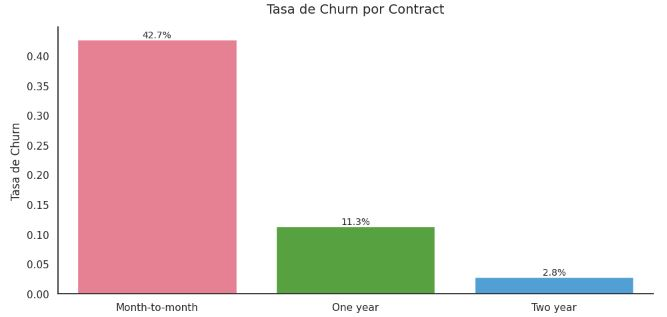

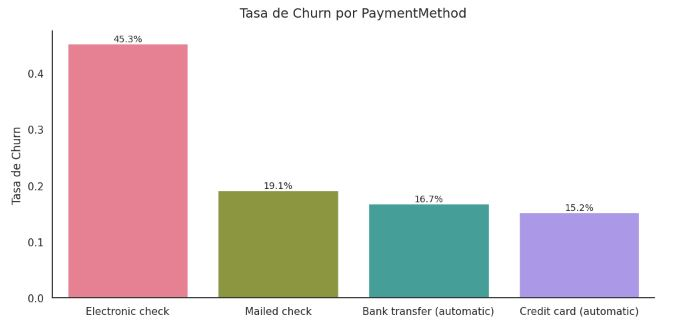

Por lo ranto, el siguiente paso es eliminar las columnas menso relevantes.

In [6]:
df.drop(['TenureGroup', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'InternetService', 'PremiumCustomer', 'NumServices', 'SeniorCitizen'], axis = 1, inplace=True)

In [7]:
df.head()

,Churn,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,9,No,Yes,No,Yes,One year,Mailed check,65.6,593.30
1,0.0,9,No,No,No,No,Month-to-month,Mailed check,59.9,542.40
2,1.0,4,No,No,Yes,No,Month-to-month,Electronic check,73.9,280.85
3,1.0,13,No,Yes,Yes,No,Month-to-month,Electronic check,98.0,1237.85
4,1.0,3,No,No,No,Yes,Month-to-month,Mailed check,83.9,267.40


In [8]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [9]:
columnas = X.columns

Se utiliza One Hot Encoder para transformar variables categóricas en datos numéricos que pueden ser utilizados por algoritmos de aprendizaje automático.

In [10]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [11]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['OnlineBackup', 'OnlineSecurity', 'Contract', 'PaymentMethod', 'DeviceProtection', 'TechSupport']
),
    remainder = 'passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)

In [12]:
X = one_hot.fit_transform(X)

In [13]:
# Get the feature names after one-hot encoding
feature_names = one_hot.get_feature_names_out()
print(feature_names)

['onehotencoder__OnlineBackup_No'
 'onehotencoder__OnlineBackup_No internet service'
 'onehotencoder__OnlineBackup_Yes' 'onehotencoder__OnlineSecurity_No'
 'onehotencoder__OnlineSecurity_No internet service'
 'onehotencoder__OnlineSecurity_Yes'
 'onehotencoder__Contract_Month-to-month'
 'onehotencoder__Contract_One year' 'onehotencoder__Contract_Two year'
 'onehotencoder__PaymentMethod_Bank transfer (automatic)'
 'onehotencoder__PaymentMethod_Credit card (automatic)'
 'onehotencoder__PaymentMethod_Electronic check'
 'onehotencoder__PaymentMethod_Mailed check'
 'onehotencoder__DeviceProtection_No'
 'onehotencoder__DeviceProtection_No internet service'
 'onehotencoder__DeviceProtection_Yes' 'onehotencoder__TechSupport_No'
 'onehotencoder__TechSupport_No internet service'
 'onehotencoder__TechSupport_Yes' 'remainder__tenure'
 'remainder__Charges.Monthly' 'remainder__Charges.Total']


In [14]:
df_one_hot = pd.DataFrame(X, columns = one_hot.get_feature_names_out())
display(df_one_hot.head())

,onehotencoder__OnlineBackup_No,onehotencoder__OnlineBackup_No internet service,onehotencoder__OnlineBackup_Yes,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),...,onehotencoder__PaymentMethod_Mailed check,onehotencoder__DeviceProtection_No,onehotencoder__DeviceProtection_No internet service,onehotencoder__DeviceProtection_Yes,onehotencoder__TechSupport_No,onehotencoder__TechSupport_No internet service,onehotencoder__TechSupport_Yes,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,9.0,65.6,593.30
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,9.0,59.9,542.40
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,73.9,280.85
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,13.0,98.0,1237.85
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,83.9,267.40


## Modelo Random Forest

In [15]:
#  Definir el Pipeline con SMOTE y el modelo
pipeline = Pipeline([
    ('smote', SMOTE(random_state=5)),  # Balanceo solo en entrenamiento
    ('modelo_arbol', DecisionTreeClassifier(class_weight='balanced', random_state=77))
])

NameError: name 'Pipeline' is not defined

In [ ]:
# Hiperparámetros a optimizar
param_grid = {
    'modelo_arbol__max_depth': [5, 10, 15],
    'modelo_arbol__min_samples_leaf': [1, 2, 4],
    'modelo_arbol__class_weight': [None, 'balanced']  # Penaliza errores en clase minoritaria
}
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',  # O 'precision' si es clave reducir falsos positivos
    cv=5
)

In [ ]:
# Métricas de evaluación
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='binary'),  # Para problemas binarios
    'precision': make_scorer(precision_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

In [ ]:
# Configurar GridSearchCV con validación cruzada estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=skf,
    scoring=scoring,
    refit='f1',  # Refinar el modelo con la métrica recall (puedes cambiarla)
    n_jobs=-1,       # Usar todos los núcleos del CPU
    verbose=2
)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Ejecutar Grid Search en los datos de entrenamiento
grid_search.fit(X_train, y_train)  # X_train y y_train originales (SMOTE se aplica internamente)

In [ ]:
# Resultados
print("\nMejores hiperparámetros:", grid_search.best_params_)
print("Mejor recall (validación):", grid_search.best_score_)

In [ ]:
from sklearn.metrics import confusion_matrix

# Evaluar el mejor modelo en test
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

print("\nMétricas en Test:")
print("------------------")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred, average='binary'):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred, average='binary'):.4f}")
print(f"F1-score: {f1_score(y_test, y_test_pred, average='binary'):.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Test")
plt.show()

In [ ]:
# Métricas
print("\nReporte de Clasificación (Threshold=0.5):")
print(classification_report(y_test, y_test_pred))

## Modelo de Regresión Lineal

In [ ]:
# Pipeline con Normalización + Balanceo + Modelo
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de features
    ('smote', SMOTE(random_state=42)),  # Balanceo solo en entrenamiento
    ('model', LogisticRegression(
        class_weight='balanced',  # Balanceo adicional
        random_state=77,
        max_iter=1000  # Para asegurar convergencia
    ))
])

# Entrenamiento
pipeline.fit(X_train, y_train)


In [ ]:
# Evaluación
y_pred = pipeline.predict(X_test)
y_probs = pipeline.predict_proba(X_test)[:, 1]  # Probabilidades para clase 1
print("\n🔹 Métricas Finales:")
print(classification_report(y_test, y_pred))
print(f"\nAUC-ROC: {roc_auc_score(y_test, y_probs):.4f}")

In [ ]:
# Matriz de Confusión
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

In [ ]:
# Curva ROC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
plt.title("Curva ROC")
plt.show()

# Conclusiones


### 📊 Comparación de Modelos Predictivos de Churn

Para evaluar el desempeño de los modelos Random Forest y Regresión Logística en la predicción de cancelación de clientes (churn), se analizaron métricas clave como precisión, recall, F1-score y exactitud. A continuación, se presenta el desglose:

---

#### 🔹 Random Forest (Umbral = 0.5)

- **Exactitud general:** 78%  
  El modelo clasifica correctamente el 78% de los casos.

- **Clase 0 – No Churn:**  
  - Precisión: 0.86 → El 86% de los clientes predichos como “no churn” realmente no abandonan.  
  - Recall: 0.85 → Captura el 85% de los clientes que efectivamente permanecen.  
  - F1-score: 0.85

- **Clase 1 – Churn:**  
  - Precisión: 0.59 → Solo el 59% de los clientes predichos como “churn” realmente abandonan.  
  - Recall: 0.60 → Detecta el 60% de los casos reales de churn.  
  - F1-score: 0.59

🔍 *Conclusión:* El modelo tiene mejor desempeño en identificar clientes que permanecen que en detectar abandonos.

---

#### 🔹 Regresión Logística

- **Exactitud general:** 75%  
  Clasifica correctamente el 75% de los casos, ligeramente por debajo de Random Forest.

- **Clase 0 – No Churn:**  
  - Precisión: 0.91 → Muy alta, con pocos falsos positivos.  
  - Recall: 0.72 → Menor capacidad para capturar todos los “no churn”.  
  - F1-score: 0.81

- **Clase 1 – Churn:**  
  - Precisión: 0.51 → Baja, con muchos falsos positivos.  
  - Recall: 0.81 → Alta capacidad para detectar abandonos reales.  
  - F1-score: 0.63

🔍 *Conclusión:* Este modelo presenta un trade-off: es más eficaz en detectar churn (alto recall), pero con menor precisión, lo que implica más falsos positivos.






## 📊 Comparación de Modelos y Recomendaciones Estratégicas

### 🎯 Objetivo del Modelo  
El principal objetivo es maximizar la detección de clientes propensos a cancelar el servicio (churn), minimizando los falsos negativos. En este contexto, **la regresión logística resulta más adecuada**, ya que presenta un **recall de 0.81**, superior al 0.60 de Random Forest.

---

### ⚖️ Balance entre Clases  
- **Random Forest** ofrece un desempeño más equilibrado en términos generales, con mayor exactitud y F1-score ponderado.  
- **Regresión Logística**, en cambio, sacrifica precisión en la clase “churn” para mejorar su capacidad de detección (recall), lo que implica más falsos positivos.

---

### 💼 Contexto de Negocio  
- Si el **costo de perder clientes** es elevado (por ejemplo, en mercados altamente competitivos o con alto valor por cliente), conviene **priorizar el recall**, incluso a costa de una menor precisión. En este caso, **la regresión logística es la opción recomendada**.  
- Si, por el contrario, los **costos de campañas de retención** son significativos y se busca evitar esfuerzos innecesarios sobre clientes que no iban a cancelar, es preferible **priorizar la precisión**, lo que favorece el uso de **Random Forest**.



